Programació per a *Data Science*
============================

Unitat 7: Anàlisi de dades en Python
------------------------------------

Instruccions d'ús
-----------------

A continuació es presentaran explicacions i exemples d'anàlisi de dades
en Python. Recordeu que podeu anar executant els exemples per obtenir-ne
els resultats.

Introducció
-----------

En aquest mòdul treballarem amb llibreries que ja hem presentat als
mòduls anteriors ([NumPy](http://www.numpy.org/),
[pandas](http://pandas.pydata.org/) i
[scikit-learn](http://scikit-learn.org)).

Aquest Notebook conté exemples concrets de tècniques que poden
aplicar-se per analitzar les dades. Com al mòdul anterior, és important
destacar que s'han seleccionat únicament algunes tècniques, però, a la
pràctica, el conjunt de tècniques que s'apliquen per a l'anàlisi de
dades és molt més extens. A més, per a la majoria d'exemples farem servir les
configuracions per defecte incorporades a les llibreries, però algunes
de les funcions que provarem tenen multitud de paràmetres que podem
ajustar.

Primers passos
--------------

Per començar, carreguem el conjunt de dades de flors d'iris:

In [1]:
from sklearn import datasets

# Carreguem el dataset d'iris:
iris = datasets.load_iris()

Anàlisi exploratòria de dades
-----------------------------

En primer lloc, observarem les característiques principals de les dades
que utilitzarem en aquest Notebook. Conèixer les dades amb les quals
treballarem ens ajudarà després en la creació de models i la validació
d'hipòtesis.

Podem donar un cop d'ull a la descripció del _dataset_:

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Al conjunt iris que acabem de carregar, les dades estan organitzades de
la manera següent: cada fila és una mostra, i per a cada mostra, les
columnes (les característiques) són: longitud del sèpal, amplada del
sèpal, longitud del pètal i amplada del pètal.

Representar visualment les dades també ens permet aproximar-nos-hi per primera 
vegada. Generarem un *scatter plot* amb els dos
primers atributs.

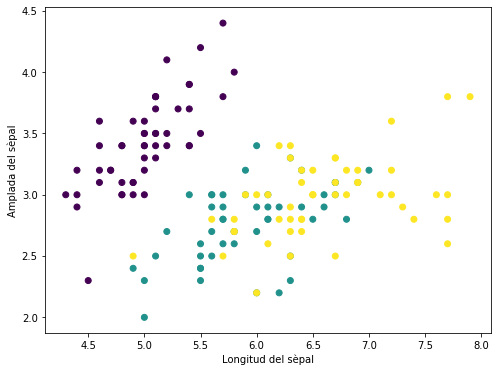

In [3]:
%matplotlib inline

# Importem les llibreries.
import matplotlib.pyplot as plt
from sklearn import datasets

# Importem el dataset.
iris = datasets.load_iris()

# Seleccionem solament els dos primers atributs.
X = iris.data[:, :2]
Y = iris.target

# Creem la figura.
plt.figure(1, figsize=(8, 6))
plt.clf()

# Acolorim utilitzant la categoria.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel(u'Longitud del sèpal')
_ = plt.ylabel(u'Amplada del sèpal')

Després, creem un *box plot* que resumeix les dades de tots els
atributs disponibles.

In [4]:
# Carreguem les dades en un dataframe de pandas.
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)

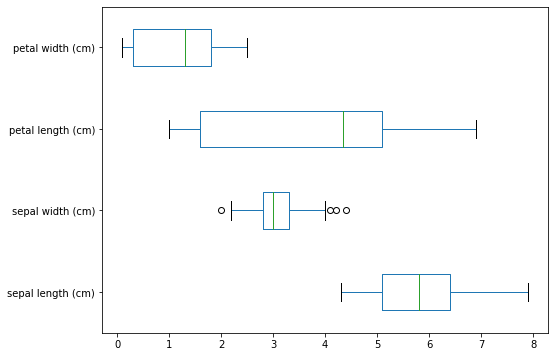

In [5]:
# Mostrem un box plot amb els quatre atributs.
df.plot.box(vert=False, figsize=(8, 6))

Finalment, mostrem histogrames per als valors de cada atribut.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2fc273c18>,
      dtype=object)

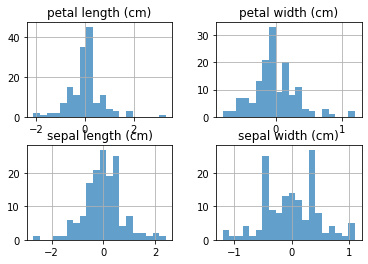

In [6]:
# Generem els histogrames.
df.diff().hist(alpha=0.7, bins=20)

Classificació
-------------

Hi ha múltiples algorismes de classificació. Vegem un exemple de
com fer servir un classificador *k nearest neighbors* per predir el tipus
d'espècies d'iris.

In [7]:
# Importem el classificador KNeighborsClassifier de la llibreria Sklearn.
from sklearn.neighbors import KNeighborsClassifier
# Importem NumPy
import numpy as np

# Seleccionem les dues primeres característiques (farem servir únicament dues característiques per
# poder representar gràficament els resultats en 2D).
X = iris.data[:, :2]
y = iris.target

# Separem les dades (de manera aleatòria) en dos subconjunts: el d'aprenentatge i el de test.
indices = np.random.permutation(len(iris.data))
iris_X_train = X[indices[:-10]]
iris_y_train = y[indices[:-10]]
iris_X_test  = X[indices[-10:]]
iris_y_test  = y[indices[-10:]]

# Creguem el classificador.
knn = KNeighborsClassifier()

# Entrenem el classificador.
knn.fit(iris_X_train, iris_y_train) 

# Provem el classificador.
iris_y_test_predicted = knn.predict(iris_X_test)

# Mostrem els resultats de la predicció sobre el conjunt de test.
print("Clases reales: \t\t" + str(iris_y_test))
print("Clases predichas: \t" + str(iris_y_test_predicted))
print("Accuracy: \t\t" + str(knn.score(iris_X_test, iris_y_test)))

Clases reales: 		[1 2 1 2 2 0 1 0 2 1]
Clases predichas: 	[1 2 1 1 2 0 1 0 1 1]
Accuracy: 		0.8


Podem visualitzar gràficament el classificador que hem après:

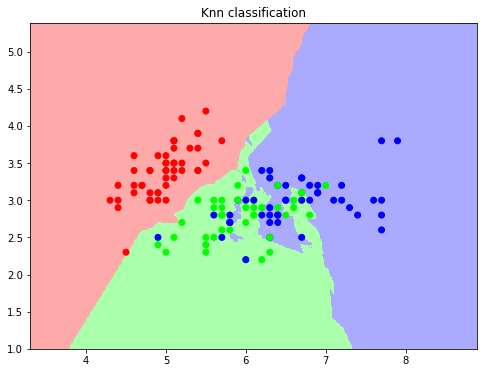

In [8]:
%matplotlib inline

# Importem la llibreria.
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Creem els mapes de colors que farem servir per a la representació.
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Calculem els limits de la visualització.
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Fem la predicció.
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Mostrem el resultat en una figura.
plt.figure(1, figsize=(8, 6))
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Mostrem les mostres fetes servir en l'aprenentatge.
plt.scatter(iris_X_train[:, 0], iris_X_train[:, 1], c=iris_y_train, cmap=cmap_bold)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Knn classification")

plt.show()

_Clustering_
----------

Com amb els algorismes de classificació, actualment hi ha multitud
d'algorismes de _clustering_. Vegem un exemple d'utilització de
l'algorisme *k-means*.

En primer lloc, generem una visualització del conjunt de mostres. A
continuació teniu un codi d'exemple en el qual representem la taxonomia de
les diferents mostres (acolorim per classe d'iris) en funció de la
longitud del sèpal (columna 0), l'amplada del sèpal (columna 1) i la
longitud del pètal (columna 2):

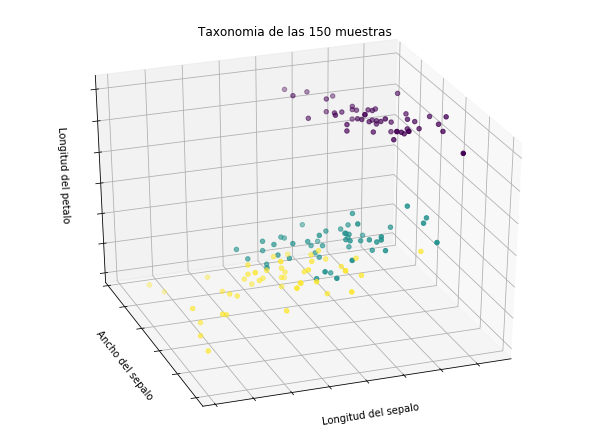

In [9]:
%matplotlib inline

# Carreguem les llibreries necessàries.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

# Carreguem el dataset.
iris = datasets.load_iris()
# Dades de la mostra
X_iris = iris.data
# Categories de la mostra (tres tipus d'Iris)
Y_iris = iris.target

# Creem una figura.
fig = plt.figure(1, figsize=(8, 6))
# De tipus 3D
ax = Axes3D(fig, elev=-150, azim=110)
# I representem els diferents punts, acolorint per tipus d'iris.
ax.scatter(X_iris[:,[0]], X_iris[:,[1]], X_iris[:,[2]], c=Y_iris)

# Llegendes i títols
ax.set_title("Taxonomia de las 150 muestras")
ax.set_xlabel("Longitud del sepalo")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Ancho del sepalo")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Longitud del petalo")
_ = ax.w_zaxis.set_ticklabels([])

Ara farem l'experiment següent: utilitzant l'algorisme de _clustering_
*k-means*, acolorirem utilitzant els grups que calculi l'algorisme i no
les classes que ja coneixem.

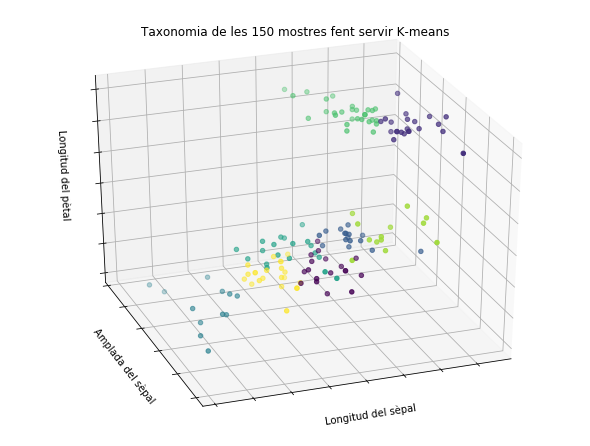

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster, datasets

iris = datasets.load_iris()
X_iris = iris.data

# Carreguem l'algorisme K-means i fem fit a les nostres dades:
k_means = cluster.KMeans()
k_means.fit(X_iris)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_iris[:,[0]], X_iris[:,[1]], X_iris[:,[2]], c=k_means.labels_)
ax.set_title("Taxonomia de les 150 mostres fent servir K-means")
ax.set_xlabel(u"Longitud del sèpal")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel(u"Amplada del sèpal")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel(u"Longitud del pètal")
_ = ax.w_zaxis.set_ticklabels([])

Fixeu-vos que en **cap moment s'utilitza la classe de la mostra**
(`iris.target`) per entrenar l'algorisme ni per avaluar-l'ho! Ara estem
utilitzant un algorisme de _clustering_, que agruparà les mostres en
funció de les seves característiques. El resultat de l'algorisme és el
grup al qual pertany cada mostra (però l'algorisme no intenta predir la
classe de la mostra). Els noms dels grups generats són arbitraris (en
aquest cas, valors enters del 0 al número de grups - 1).

Forçarem que el nombre de clústers sigui igual a 3 i en representarem el
resultat:

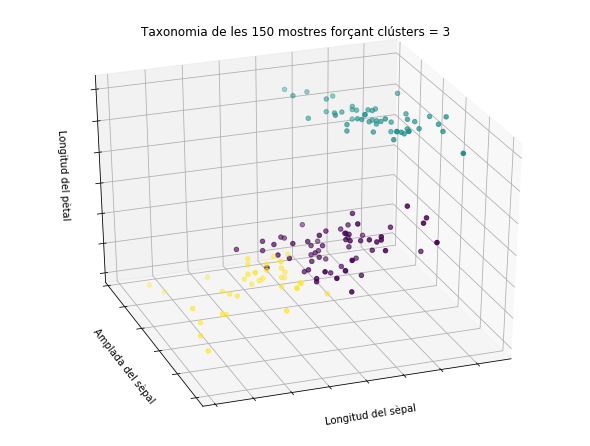

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster, datasets

iris = datasets.load_iris()
X_iris = iris.data

# Carreguem l'algorisme K-means i fem fit a les nostres dades,
# aquesta vegada forçant el nombre de clústers a tres:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_iris[:,[0]], X_iris[:,[1]], X_iris[:,[2]], c=k_means.labels_)
ax.set_title(u"Taxonomia de les 150 mostres forçant clústers = 3")
ax.set_xlabel(u"Longitud del sèpal")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel(u"Amplada del sèpal")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel(u"Longitud del pètal")
_ = ax.w_zaxis.set_ticklabels([])

Recordeu que utilitzant un algorisme de _clustering_ no aprenem a quina
classe pertany cada mostra, sinó que simplement agrupem les mostres en
grups (clústers).

Validació del model
-------------------

Hem d'evitar avaluar els models amb les mateixes dades que s'han
utilitzat per a l'aprenentatge. A l'exemple de classificació, hem
separat les dades de manera aleatòria en dos conjunts, un per a
l'aprenentatge i un per al test. Aquesta tècnica es coneix com a
*holdout*. A l'exemple de la classificació hem fet servir NumPy per crear els
dos conjunts. A la unitat 6 vam veure com fer aquest mateix procés
usant les funcions sobre _dataframes_ que ofereix la lliberia Pandas. Ara
veurem com podem fer-ho amb Sklearn:

In [12]:
# Importem la funció 'train_test_split'.
from sklearn.model_selection import train_test_split

# Separem les mostres utilitzant un 20% per a test i la resta per a aprenentatge.
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

print("Total de mostres: " + str(len(iris.data)))
print("Aprenentatge: " + str(len(X_train)), "(" + str(float(len(X_train))/len(iris.data)*100) + "%)")
print("Test: " + str(len(X_test)), "(" + str(float(len(X_test))/len(iris.data)*100) + "%)")

Total de mostres: 150
Aprenentatge: 120 (80.0%)
Test: 30 (20.0%)


També podem fer servir altres tècniques per avaluar els models, per exemple,
*kfold* o *leave one out*:

In [13]:
# Importem la funció KFold.
from sklearn.model_selection import KFold
# Importem NumPy.
import numpy as np

# Dividim un conjunt de nou mostres fent servir 3-Fold i en mostrem el resultat.
X = np.array(range(9))
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (X[train], X[test]))

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [14]:
# Importem la funció 'LeaveOneOut'.
from sklearn.model_selection import LeaveOneOut
# Importem NumPy
import numpy as np

# Dividim un conjunt de nou mostres fent servir 'LeaveOneOut' i en mostrem el resultat.
X = np.array(range(9))
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (X[train], X[test]))

[1 2 3 4 5 6 7 8] [0]
[0 2 3 4 5 6 7 8] [1]
[0 1 3 4 5 6 7 8] [2]
[0 1 2 4 5 6 7 8] [3]
[0 1 2 3 5 6 7 8] [4]
[0 1 2 3 4 6 7 8] [5]
[0 1 2 3 4 5 7 8] [6]
[0 1 2 3 4 5 6 8] [7]
[0 1 2 3 4 5 6 7] [8]
